In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [32]:
sns.set()

In [33]:
df = pd.read_csv('../data/titanic/train.csv')

### EDA

In [34]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
sns.pairplot(df, hue = 'Survived', plot_kws = {'alpha': 0.1})
plt.show()

In [ ]:
print(
    f"Survived: {df['Survived'].sum()}\n"
    f"Not Survived: {len(df) - df['Survived'].sum()}"
)

## preprocessing

In [35]:
# drop rows with no age data
df = df[df['Age'].notna()]

# drop columns that are not useful for the model
df = df.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'])

# one-hot encode
df = pd.get_dummies(df)

# split into X and y
X = df.drop(columns = ['Survived'])
y = df['Survived']

## tuning parameters

In [11]:
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('rf', RandomForestClassifier())
])

cv = KFold(n_splits = 5, shuffle = True, random_state = 42)

param_grid = {
    'rf__n_estimators': np.linspace(1, 100, 100).astype(int)
}

grid = GridSearchCV(
    pipe,
    param_grid = param_grid,
    cv = cv,
)

grid.fit(X, y)

pd.DataFrame(grid.cv_results_)

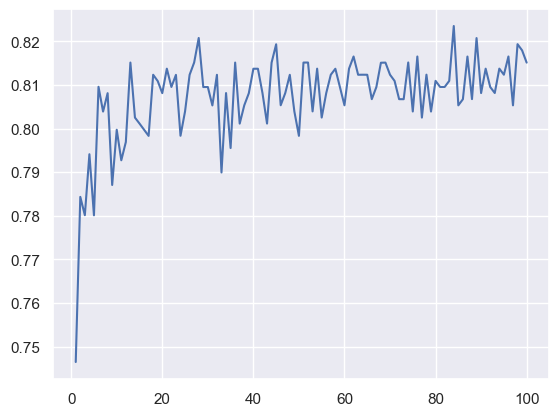

In [17]:
plt.plot(
    [list(i.values())[0] for i in grid.cv_results_['params']], 
    grid.cv_results_['mean_test_score'],
)
plt.show()

## build a model

In [56]:
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators = 34)), 
])

pipe.fit(X, y)

Pipeline(steps=[('sc', StandardScaler()),
                ('rf', RandomForestClassifier(n_estimators=34))])

## evaluate a model

In [57]:
score = cross_val_score(pipe, X, y, cv = cv, n_jobs = -1)
np.mean(score)

0.8221412390426475

## test a model

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

_, X_test, _, y_test = train_test_split(X, y, test_size = 0.2)
pred = pipe.predict(X_test)
accuracy_score(y_test, pred)

0.9790209790209791